<a href="https://colab.research.google.com/github/MathildaFlorenstikaSofiana/Pemprograman-Python/blob/main/Tugas_Pemrograman_Python_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [31]:
ls

'1101194071 Registrasi _ Telkom University (1).html'
'1101194071 Registrasi _ Telkom University.html'
'15. SENI BUDAYA OK.rar'
 3scene@
'40_Mathilda Florenstika Sofiana (1).pdf'
'40_Mathilda Florenstika Sofiana.pdf'
 Bolawolon.jpeg
'CamScanner 11-10-2020 13.47.10.pdf'
'CamScanner 11-24-2020 13.40.01.pdf'
 Classroom/
'Colab Notebooks'/
'Getting started.pdf'
'Jawaban TA.pdf'
 KTP.jpg
'Mathilda Florenstika Sofiana_1101194071_101 (1).pdf'
'Mathilda Florenstika Sofiana_1101194071_101 (2).pdf'
'Mathilda Florenstika Sofiana_1101194071_101.docx'
'Mathilda Florenstika Sofiana_1101194071_101.pdf'
'Mathilda Florenstika Sofiana_1101194071_40 (1).pdf'
'Mathilda Florenstika Sofiana_1101194071_40 (2).pdf'
'Mathilda Florenstika Sofiana_1101194071_40 (3).pdf'
'Mathilda Florenstika Sofiana_1101194071_40 (4).pdf'
'Mathilda Florenstika Sofiana_1101194071_40.pdf'
'Mathilda Florenstika Sofiana_1101194071_TT-43-02_43.rar'
'Mathilda Florenstika Sofiana-40.pdf'
'Meet Recordings'/
'mjs-gzco-mjh - Oct 19, 2020.g

In [32]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [33]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [34]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 128x128 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [35]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [36]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [37]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [38]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [45]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(200, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(32, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 200)               9830600   
_________________________________________________________________
layer2 (Dense)               (None, 32)                6432      
_________________________________________________________________
layer3 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 99        
Total params: 9,838,187
Trainable params: 9,838,187
Non-trainable params: 0
_________________________________________________________________


In [47]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 2s 74ms/step - loss: 4.0500 - accuracy: 0.3924 - val_loss: 2.0220 - val_accuracy: 0.2869
Epoch 2/25
23/23 [==============================] - 2s 68ms/step - loss: 1.5113 - accuracy: 0.5513 - val_loss: 1.6106 - val_accuracy: 0.4726
Epoch 3/25
23/23 [==============================] - 2s 68ms/step - loss: 0.9150 - accuracy: 0.6568 - val_loss: 1.2785 - val_accuracy: 0.5443
Epoch 4/25
23/23 [==============================] - 2s 69ms/step - loss: 0.8548 - accuracy: 0.6596 - val_loss: 1.6294 - val_accuracy: 0.5021
Epoch 5/25
23/23 [==============================] - 2s 68ms/step - loss: 0.7140 - accuracy: 0.7229 - val_loss: 0.7844 - val_accuracy: 0.6835
Epoch 6/25
23/23 [==============================] - 2s 68ms/step - loss: 0.6667 - accuracy: 0.7286 - val_loss: 0.7973 - val_accuracy: 0.6878
Epoch 7/25
23/23 [==============================] - 2s 68ms/step - loss: 0.5255 - accuracy: 0.7947 - val_loss: 0.9636 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


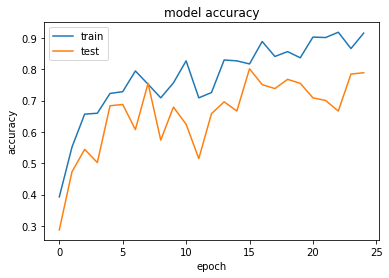

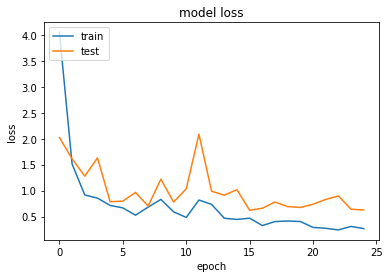

In [48]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.77      0.87      0.82        98
      forest       0.89      0.72      0.80        80
     highway       0.71      0.75      0.73        59

    accuracy                           0.79       237
   macro avg       0.79      0.78      0.78       237
weighted avg       0.80      0.79      0.79       237



In [50]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [51]:
import cv2
import matplotlib.pyplot as plt
image1='coast.jpeg'

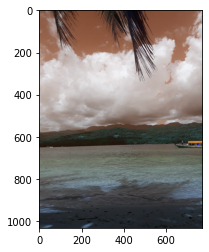

In [52]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [54]:

image_testing = Image.open('coast.jpeg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [55]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [56]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.7371566e-01 3.5326329e-07 2.6284056e-02]]
['coast']
